# Regresión no lienal
La regresión lineal es la aproximación de un modelo no lineal que se utiliza para describir la relación entre dos o más variables. Es importante notar que la no linealidad está en los parámetros:

* La regresión no lineal es un método para modelar una relación no lineal entre la variable dependiente y un conjunto de variables independientes.
* Para que un modelo sea considerado no lineal, la variable dependiente debe ser una función no lineal de los parámetros, no necesariamente de las variables independientes. Cuando se trata de la ecuación no lineal, puede ser la forma de exponencial, logarítmico, y logística, o muchos otros tipos.
  
Los objetivos principales son:
* Identificar la fuerza del efecto que las variables independientes tienen en una variable dependiente.
* Predecir el impacto de cambios en la variable dependiente cuando cambiamos las variables independientes. Cabe notar que esto último se hace cambiano una variable independiente a la vez y dejando las otras variables independientes constantes.
* Predecir valores continuos.

#### Contenido
* Regresión no lineal en dos dimensiones
* Algunos modelos comunes en regresión no lineal

Se ocuparan las siguientes librerías

In [3]:
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Regresión no lineal en dos dimensiones
Se trata de una regresión no lineal con una variable predictora x y una variable a predecir y. 

Para hacer una regresión no lineal con una función no lineal en parámetros theta_1,...,theta_n use el siguiente código.  
1. Definir una función no lineal en parámetros $y = f(x;\theta_1,...,\theta_n)$.  
`def f(x):`  
`    y = f(x; theta_1,...,theta_n)`  
`    return y`  
2. Importar herramientas requeridas.  
`from scipy.optimize import curve_fit`  
3. Definir la predictoras col y las variables a predecir col_obj.  
`x_data = df['col']`  
`y_data = df['col_obj']`  
5. Estimar los parámetros.  
`popt, pcov = curve_fit(f, x_data, y_data)`  
donde:
* `popt` es un vector con los parámetros óptimos.
* `pcov` es la matriz de covarianza.
6. Verificar visualmente el ajuste.    
`x_est = np.linspace(min(x_data), max(x_data), 10000)`  
`y_est = f(x_est, *popt)`  
`sns.scatterplot(x_data, y_data, label = 'Actual data')`  
`sns.lineplot(x = x_est, y = y_est, color = 'r', label = 'Estimated curve' )`

Esto es:   
`def f(x):`  
`    y = f(x; theta_1,...,theta_n)`  
`    return y`  
`x_data = df['col']`  
`y_data = df['col_obj']`  
`from scipy.optimize import curve_fit`    
`popt, pcov = curve_fit(f, x_data, y_data)`  
`x_est = np.linspace(min(x_data), max(x_data), 10000)`  
`y_est = f(x_est, *popt)`  
`sns.scatterplot(x = x_data, y = y_data, label = 'Actual data')`  
`sns.lineplot(x = x_est, y = y_est, color = 'r', label = 'Estimated curve')`

Para realizar el desarrollo del modelo se utilizará el siguiente conjunto de datos. Éste se encuentra preprocesado y normalizado. La variable predictora es x y la variable a predecir es y.

<Axes: xlabel='x', ylabel='y'>

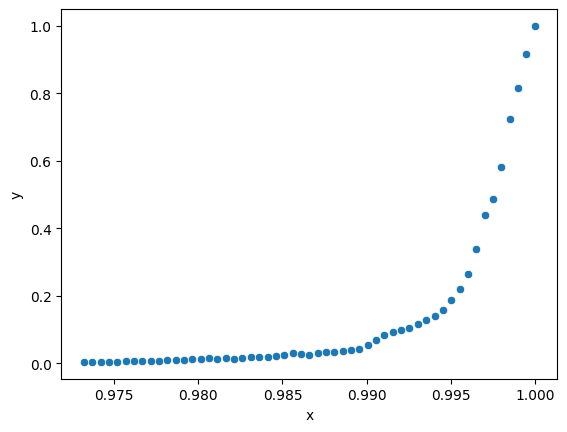

In [40]:
path = '/Users/RamsesLg/Desktop/Espacio_de_trabajo/Guía_DS/Python/Data/df_non_linear_regression.csv'
df = pd.read_csv(path)
df.head()
sns.scatterplot(x = 'x', y = 'y' , data = df)

In [41]:
# Definir función
def f(x, theta_1, theta_2):
     y = 1 / (1 + np.exp(-theta_1*(x-theta_2)))
     return y

In [44]:
# Estimar parámetros
from scipy.optimize import curve_fit
x_data = df['x']
y_data = df['y']
popt, pcov = curve_fit(f, x_data, y_data)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453614, beta_2 = 0.997207


<Axes: xlabel='x', ylabel='y'>

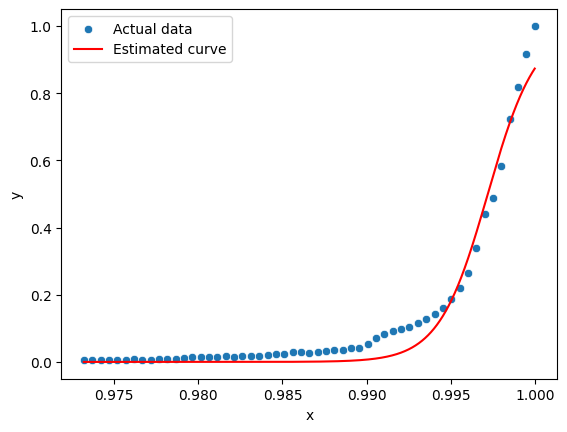

In [46]:
# Graficar
import seaborn as sns
x_est = np.linspace(min(x_data), max(x_data), 10000)
y_est = f(x_est, *popt)
sns.scatterplot( x = x_data, y = y_data, label = 'Actual data')
sns.lineplot(x = x_est, y = y_est, color = 'r', label = 'Estimated curve' )

## Modelos comunes en regresión no lineal

**Modelo de regresión asintótica 1**
$$f(x;\beta_1,\beta_2,\beta_3) = \beta_1 + \beta_2 e^{\beta_3 x}$$

In [5]:
def f(x, b1, b2, b3):
    return b1 + b2 * np.exp(b3 * x)

<Axes: >

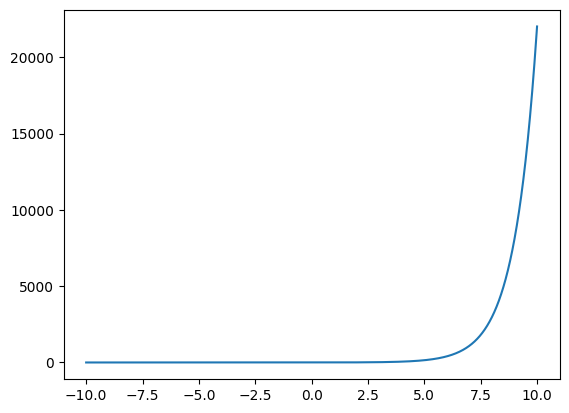

In [12]:
x = np.linspace(-10, 10, 10000)
y = f(x,0,1,1)
sns.lineplot(x = x, y = y)

**Modelo de regresión asintótica 2**
$$f(x;\beta_1,\beta_2,\beta_3) = \beta_1 - \beta_2\beta_3^x$$

In [14]:
def f(x, b1, b2, b3):
    return b1 - (b2 * (b3 ** x))

<Axes: >

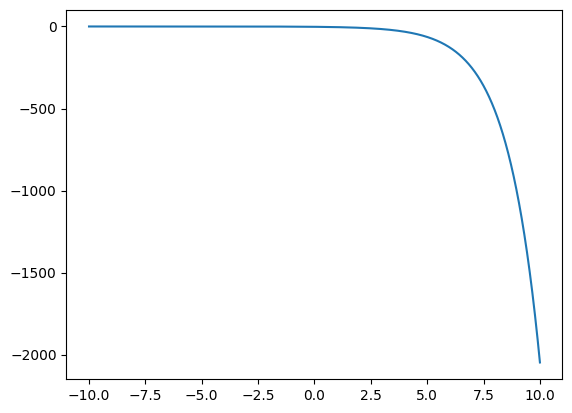

In [18]:
x = np.linspace(-10, 10, 10000)
y = f(x,0,2,2)
sns.lineplot(x = x, y = y)

**Modelo Gaussiano**
$$f(x;\beta_1,\beta_2,\beta_3) = \beta_1(1-\beta_3e^{-\beta_2x^2})$$

In [159]:
def f(x, b1, b2, b3):
    return b1 * (1 - b3 * np.exp(-b2 * x ** 2))

<Axes: >

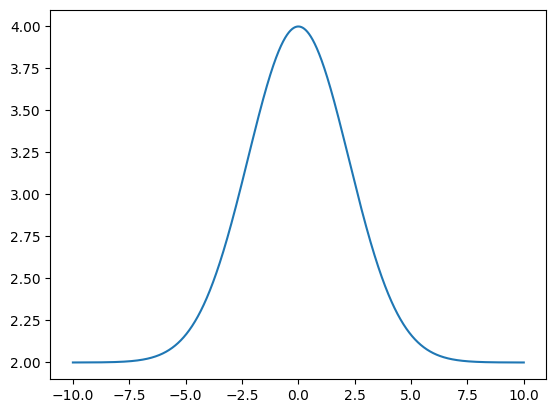

In [171]:
x = np.linspace(-10, 10, 10000)
y = f(x,2,0.1,-1)
sns.lineplot(x = x, y = y)

**Modelo Gompertz**  
$$f(x;\beta_1,\beta_2,\beta_3) = \beta_1e^{-\beta_2e^{-\beta_3x}}$$


In [40]:
def f(x, b1, b2, b3):
    return b1 * np.exp(-b2 * np.exp(-b3 * x))

<Axes: >

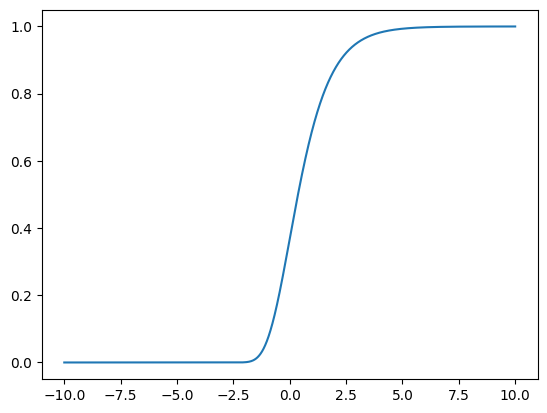

In [45]:
x = np.linspace(-10, 10, 10000)
y = f(x,1,1,1)
sns.lineplot(x = x, y = y)

**Modelo Log-Modified**
$$f(x;\beta_1,\beta_2,\beta_3) = (\beta_1+\beta_3x)^{\beta_2}$$

In [62]:
def f(x, b1, b2, b3):
    return (b1 + b3 * x) ** b2

<Axes: >

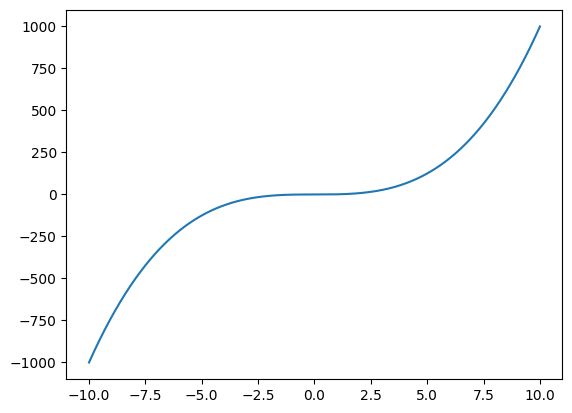

In [72]:
x = np.linspace(-10, 10, 10000)
y = f(x,0,3,1)
sns.lineplot(x = x, y = y)

**Modelo Log-Logistic**
$$f(x;\beta_1,\beta_2,\beta_3) = \beta_1-ln(1+\beta_2e^{-\beta_3x})$$

In [78]:
def f(x, b1, b2, b3):
    return b1 - np.log(1 + b2 * np.exp(-b3 * x))

<Axes: >

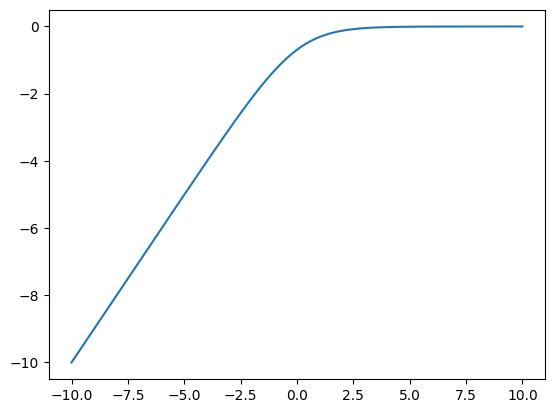

In [83]:
x = np.linspace(-10, 10, 10000)
y = f(x,0,1,1)
sns.lineplot(x = x, y = y)

**Modelo Weibull**
$$f(x;\beta_1,\beta_2,\beta_3, \beta_4) = \beta_1-\beta_2 e^{-\beta_3x^{\beta_4}}$$

In [142]:
def f(x, b1, b2, b3, b4):
    return b1 - b2 * np.exp(-b3 * x ** b4)

<Axes: >

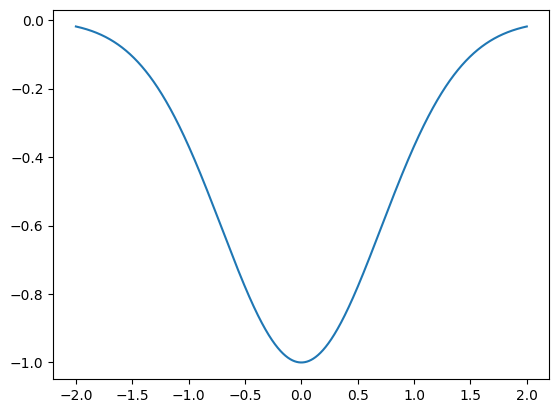

In [138]:
x = np.linspace(-2, 2, 10000)
y = f(x,0,1,1,2)
sns.lineplot(x = x, y = y)

In [172]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y
